# Assignment 2. Heart rate detection
Hardware 1 - Orientation to Health Technology<br>
Your name: **Matias Ruonala**<br>
Date returned: **24.1.2023**<br>
Metropolia University of Applied Sciences<br>

## 1. Setup

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import heartpy as hp

## 2. All data
Read in and plot all data.

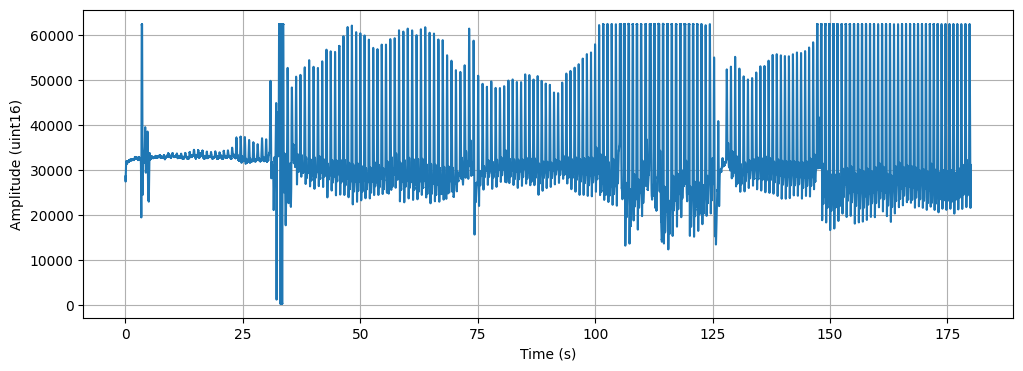

In [135]:
# I dont see how I would try to write this any different so I'm just copy-pasting here
data = hp.get_data('capture01_250Hz.txt')
# Create a time vector
Fs = 250 # Sampling rate (samples per second)
time = np.arange(len(data))/Fs
# Plot the whole data in a graphical figure
plt.figure(figsize = (12, 4))
plt.plot(time, data)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.show()

## 3. Selected segment
Select a **60 seconds** segment from the data and make a graph of it.

Segment starts from: 51 s


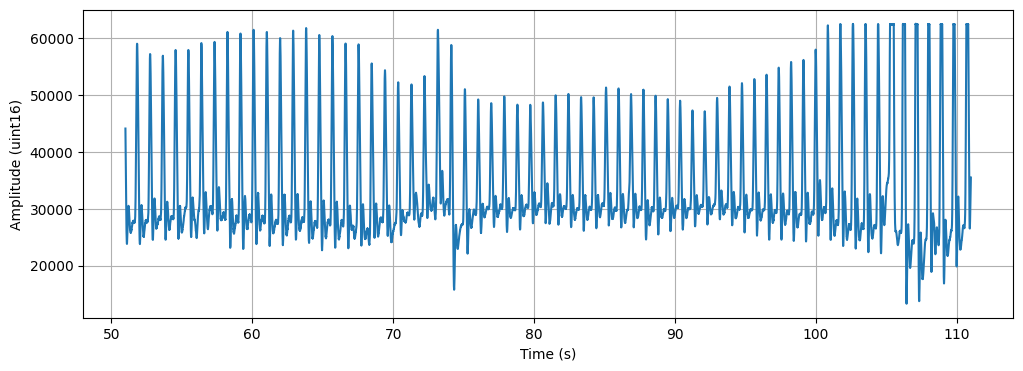

In [136]:
# Copy-pasting again
# Random seed based on the last four digits of the student ID number
np.random.seed(8632)
t0 = np.random.randint(30, 100)
print(f'Segment starts from: {t0} s')

# Select a segment
i = (t0 < time) & (time < t0 + 60)
data2 = data[i]
time2 = time[i]
# Plot the selected segment
plt.figure(figsize = (12, 4))
plt.plot(time2, data2)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.show()


## 4. Peak detection and HRV measurements
Detect the peaks from the selected segment of data, make a graph of the processed data segment to show the peaks, and finally display the measures computed.

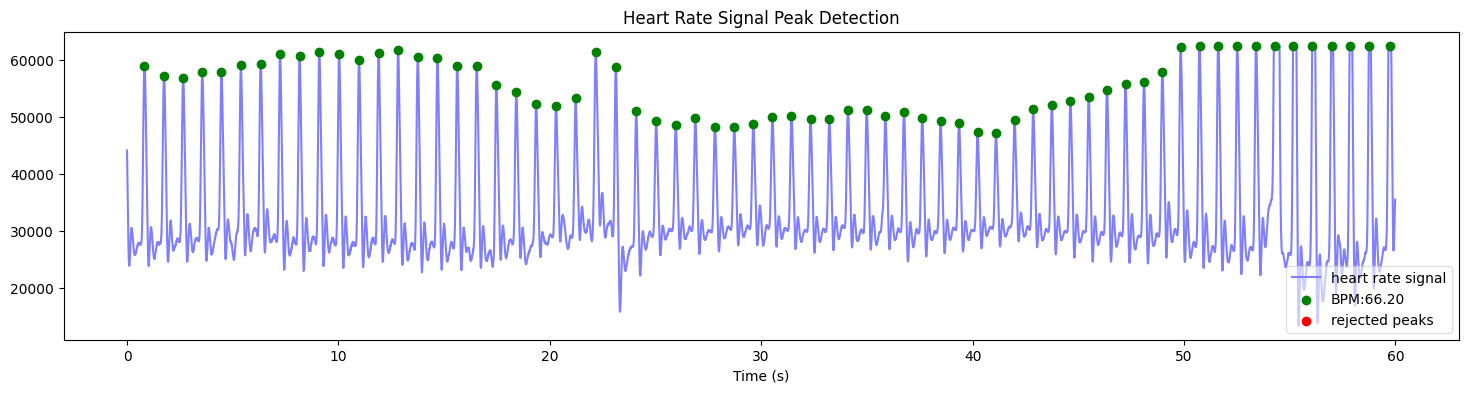

In [137]:
working_data, measures = hp.process(data2, 250)
hp.plotter(working_data, measures   , figsize=(18, 4))


In [138]:
for item in measures:
    print(item + ": " + str(round(measures[item], 2)))

bpm: 66.2
ibi: 906.28
sdnn: 28.37
sdsd: 13.87
rmssd: 18.26
pnn20: 0.17
pnn50: 0.03
hr_mad: 24.0
sd1: 12.9
sd2: 37.35
s: 1513.9
sd1/sd2: 0.35
breathingrate: 0.23


## 5. Interpretations

The person studied is 55-64 year-old male, so all interpretations are based on that knowledge. All HRV parameters are compared to the reference values in second lecture slides.

<dl>
<dt>1. What was the average heart rate? Was it low or high?</dt>

<dd>Heart rate was 66 beats per minute. Since mean IBI is roughly the same thing as mean NN, and there is a direct relationship between mean IBI and heart rate, they all are within normal boundaries, and almost excactly average. (mean IBI = 906, reference value for mean NN = 904+-123)</dd>

<dt>2. What was the average inter-beat-interval? Was it low or high?</dt>
<dd>See above</dd>

<dt>How much variation is in the inter-beat-intervals? Which variation measure would you use? Why? Was that value low or high?</dt>

<dd>3. The standard deviation in IBI is 28.4 ms. I would use SDNN in this case, since it reflects the overall variation in the interval series.
SDNN=28.4 ms is bit low for a male aged 55-64, but well within normal boundaries.</dd>

<dt>4. Based on these: How would you interpret the recovery and stress level of the person studied?</dt>

<dd>I would interpret him to have normal recovery rates and stress level. His SD1/SD2-value, which is about dead average, speaks also for that fact.</dd>
</dl>